In [518]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


In [519]:
df = pd.read_csv('CVD_cleaned.csv')

# 读取数据，对数据进行简单的处理
df['General_Health_num'] = df['General_Health'].replace({'Poor': 0, 'Fair': 1, 'Good': 2, 'Very Good': 3, 'Excellent': 4})
df['Diabetes'] = df['Diabetes'].replace({'No': 0, 'Yes': 1, 'Yes, but female told only during pregnancy': 1, 'No, pre-diabetes or borderline diabetes': 0})
df['Age_Category'] = df['Age_Category'].str[:2]

# 将水果消费和蔬菜消费统一成健康消费
df['Healthy_Consumption'] = df['Fruit_Consumption'] + df['Green_Vegetables_Consumption']
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,...,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_num,Healthy_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,0,Yes,Female,...,150.00,32.66,14.54,Yes,0.00,30.00,16.00,12.00,0,46.00
1,Very Good,Within the past year,No,Yes,No,No,No,1,No,Female,...,165.00,77.11,28.29,No,0.00,30.00,0.00,4.00,3,30.00
2,Very Good,Within the past year,Yes,No,No,No,No,1,No,Female,...,163.00,88.45,33.47,No,4.00,12.00,3.00,16.00,3,15.00
3,Poor,Within the past year,Yes,Yes,No,No,No,1,No,Male,...,180.00,93.44,28.73,No,0.00,30.00,30.00,8.00,0,60.00
4,Good,Within the past year,No,No,No,No,No,0,No,Male,...,191.00,88.45,24.37,Yes,0.00,8.00,4.00,0.00,2,12.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,0,No,Male,...,168.00,81.65,29.05,No,4.00,30.00,8.00,0.00,3,38.00
308850,Fair,Within the past 5 years,Yes,No,No,No,No,1,No,Male,...,180.00,69.85,21.48,No,8.00,15.00,60.00,4.00,1,75.00
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,1,No,Female,...,157.00,61.23,24.69,Yes,4.00,40.00,8.00,4.00,3,48.00
308852,Very Good,Within the past year,Yes,No,No,No,No,0,No,Male,...,183.00,79.38,23.73,No,3.00,30.00,12.00,0.00,3,42.00


In [520]:
# 将分类变量转换为数值
label_encoder = LabelEncoder()
df['General_Health_num'] = label_encoder.fit_transform(df['General_Health_num'])
df['Checkup'] = label_encoder.fit_transform(df['Checkup'])
df['Exercise'] = label_encoder.fit_transform(df['Exercise'])
df['Skin_Cancer'] = label_encoder.fit_transform(df['Skin_Cancer'])
df['Other_Cancer'] = label_encoder.fit_transform(df['Other_Cancer'])
df['Depression'] = label_encoder.fit_transform(df['Depression'])
df['Diabetes'] = label_encoder.fit_transform(df['Diabetes'])
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Age_Category'] = label_encoder.fit_transform(df['Age_Category'])
df['Arthritis'] = label_encoder.fit_transform(df['Arthritis'])
df['Smoking_History'] = label_encoder.fit_transform(df['Smoking_History'])
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,...,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_num,Healthy_Consumption
0,Poor,2,0,No,0,0,0,0,1,0,...,150.00,32.66,14.54,1,0.00,30.00,16.00,12.00,0,46.00
1,Very Good,4,0,Yes,0,0,0,1,0,0,...,165.00,77.11,28.29,0,0.00,30.00,0.00,4.00,3,30.00
2,Very Good,4,1,No,0,0,0,1,0,0,...,163.00,88.45,33.47,0,4.00,12.00,3.00,16.00,3,15.00
3,Poor,4,1,Yes,0,0,0,1,0,1,...,180.00,93.44,28.73,0,0.00,30.00,30.00,8.00,0,60.00
4,Good,4,0,No,0,0,0,0,0,1,...,191.00,88.45,24.37,1,0.00,8.00,4.00,0.00,2,12.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,4,1,No,0,0,0,0,0,1,...,168.00,81.65,29.05,0,4.00,30.00,8.00,0.00,3,38.00
308850,Fair,3,1,No,0,0,0,1,0,1,...,180.00,69.85,21.48,0,8.00,15.00,60.00,4.00,1,75.00
308851,Very Good,0,1,No,0,0,1,1,0,0,...,157.00,61.23,24.69,1,4.00,40.00,8.00,4.00,3,48.00
308852,Very Good,4,1,No,0,0,0,0,0,1,...,183.00,79.38,23.73,0,3.00,30.00,12.00,0.00,3,42.00


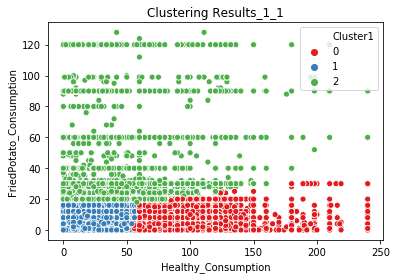

In [521]:
# 提取炸土豆消费和健康食物消费这两大关键的人为习惯因素进行聚类，观察聚类结果和心血管疾病的关系
features = df[['FriedPotato_Consumption', 'Healthy_Consumption']]

# 标准化数据
features_standardized = (features - features.mean()) / features.std()

# 进行聚类
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster1'] = kmeans.fit_predict(features_standardized)

# 绘制散点图查看聚类结果
sns.scatterplot(x='Healthy_Consumption', y='FriedPotato_Consumption', hue='Cluster1', data=df, palette='Set1')

plt.title('Clustering Results_1_1')
plt.savefig('Healthy_Consumption_FriedPotato_Consumption_Cluster.png')
plt.show()

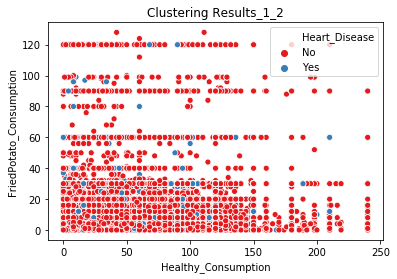

In [522]:
# 绘制散点图查看心血管疾病和两种人为习惯因素的关系，与分类结果的图作比对
sns.scatterplot(x='Healthy_Consumption', y='FriedPotato_Consumption', hue='Heart_Disease', data=df, palette='Set1')

plt.title('Clustering Results_1_2')
plt.savefig('Healthy_Consumption_FriedPotato_Consumption_Heart_Disease.png')
plt.show()

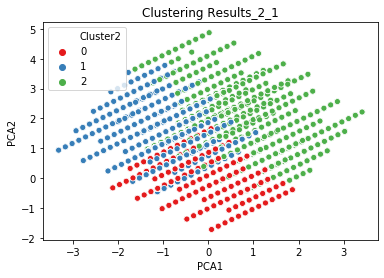

In [523]:
# 提取运动、年龄、体检和健康状态这四种健康因素进行聚类，再进行降维，观察聚类结果和心血管疾病的关系
features = df[['Exercise', 'Age_Category', 'Checkup', 'General_Health_num']]

# 标准化数据
features_standardized = (features - features.mean()) / features.std()

# 进行聚类
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster2'] = kmeans.fit_predict(features_standardized)

# 降维至2维
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features_standardized)

# 添加降维后的两个维度到DataFrame
df['PCA1'] = reduced_features[:, 0]
df['PCA2'] = reduced_features[:, 1]

# 绘制散点图查看降维后的分类结果
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster2', data=df, palette='Set1')
plt.title('Clustering Results_2_1')
plt.savefig('PCA1_PCA2_Cluster.png')
plt.show()


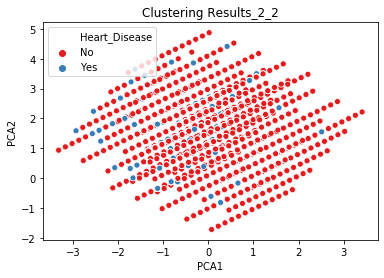

In [524]:
# 绘制散点图查看心血管疾病和降维后的数据的关系，与聚类结果作比较
sns.scatterplot(x='PCA1', y='PCA2', hue='Heart_Disease', data=df, palette='Set1')

plt.title('Clustering Results_2_2')
plt.savefig('PCA1_PCA2_Heart_Disease.png')
plt.show()

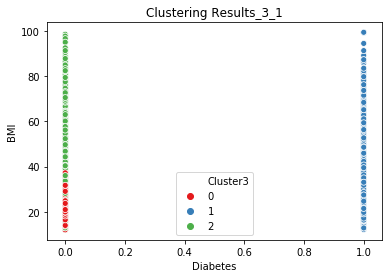

In [525]:
# 提取BMI、健康状态和糖尿病三种特征列进行聚类，观察三种特征聚类结果
features = df[['BMI', 'General_Health_num', 'Diabetes']]

# 标准化数据
features_standardized = (features - features.mean()) / features.std()

# 进行聚类
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster3'] = kmeans.fit_predict(features_standardized)

# 绘制散点图查看聚类结果
sns.scatterplot(x='Diabetes', y='BMI', hue='Cluster3', data=df, palette='Set1')

plt.title('Clustering Results_3_1')
plt.savefig('Diabetes_BMI_cluster.png')
plt.show()

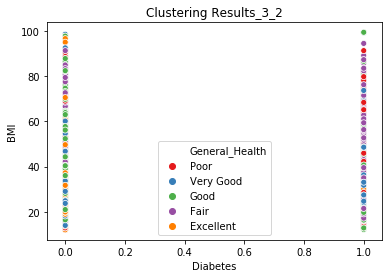

In [526]:
# 绘制散点图查看健康状态与BMI和糖尿病三者之间的关系，与聚类结果作比较
sns.scatterplot(x='Diabetes', y='BMI', hue='General_Health', data=df, palette='Set1')

plt.title('Clustering Results_3_2')
plt.savefig('Diabetes_BMI_General_Health.png')
plt.show()